## Automobile customer segmentation

## Context
Customer segmentation is the practice of dividing a customer base into groups of individuals that are similar in specific ways relevant to marketing, such as age, gender, interests and spending habits.

Companies employing customer segmentation operate under the fact that every customer is different and that their marketing efforts would be better served if they target specific, smaller groups with messages that those consumers would find relevant and lead them to buy something. Companies also hope to gain a deeper understanding of their customers' preferences and needs with the idea of discovering what each segment finds most valuable to more accurately tailor marketing materials toward that segment.

## Content
An automobile company has plans to enter new markets with their existing products (P1, P2, P3, P4 and P5). After intensive market research, they’ve deduced that the behavior of new market is similar to their existing market.

In their existing market, the sales team has classified all customers into 4 segments (A, B, C, D ). Then, they performed segmented outreach and communication for different segment of customers. This strategy has work exceptionally well for them. They plan to use the same strategy on new markets and have identified 2627 new potential customers.

The dataset provides the details of the existing and potential customers of the company based on the purchase history and the corresponding segments they have been classified into.

## Data Dictionary
<br>CustomerID : unique customer ID
<br>Gender : gender of the customer
<br>Married : marital status of the customer
<br>Age : age of the customer
<br>Graduated : specifies whether the customer a graduate?
<br>Profession : profession of the customer
<br>WorkExperience : work experience of the customer in years
<br>SpendingScore : spending score of the customer
<br>FamilySize : number of family members of the customer (including the customer)
<br>Category : anonymised category for the customer
<br>Segmentation : (target variable) customer segment of the customer

**Dataset**
Link :https://www.kaggle.com/datasets/akashdeepkuila/automobile-customer?select=train-set.csv

In [1]:
## importing library
import warnings
warnings.filterwarnings('ignore')


import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.decomposition import PCA
from sklearn import preprocessing
from sklearn.cluster import KMeans
#Evaluation Metrics
from sklearn.metrics import silhouette_score, silhouette_samples
#To getSilhouette Visualization
from yellowbrick.cluster import SilhouetteVisualizer
#To get clusters in hierarchical clustering
from scipy.cluster.hierarchy import dendrogram,linkage

## Data loading

In [2]:
data = pd.read_csv('train-set.csv')

In [3]:
data.head()

,CustomerID,Gender,Married,Age,Graduated,Profession,WorkExperience,SpendingScore,FamilySize,Category,Segmentation
0,462809,Male,No,22,No,Healthcare,1.0,Low,4.0,Category 4,D
1,462643,Female,Yes,38,Yes,Engineer,NaN,Average,3.0,Category 4,A
2,466315,Female,Yes,67,Yes,Engineer,1.0,Low,1.0,Category 6,B
3,461735,Male,Yes,67,Yes,Lawyer,0.0,High,2.0,Category 6,B
4,462669,Female,Yes,40,Yes,Entertainment,NaN,High,6.0,Category 6,A


## Data preprocessing

In [4]:
## shape of dataset
print("the rows and features present are ", data.shape[0],'and', data.shape[1])

the rows and features present are  8068 and 11


In [5]:
# checking the null value
data.isnull().sum()

CustomerID          0
Gender              0
Married           140
Age                 0
Graduated          78
Profession        124
WorkExperience    829
SpendingScore       0
FamilySize        335
Category           76
Segmentation        0
dtype: int64

**Inference:** 
workexperience has the maximum null values 

In [6]:
null_column = ['Married','Graduated','Profession','WorkExperience','FamilySize','Category']
for col in null_column:
    data = data[data[col].notnull()]

In [7]:
data.isnull().sum()

CustomerID        0
Gender            0
Married           0
Age               0
Graduated         0
Profession        0
WorkExperience    0
SpendingScore     0
FamilySize        0
Category          0
Segmentation      0
dtype: int64

In [8]:
## shape of dataset after removing all the null values
print("the rows and features present are ", data.shape[0],'and', data.shape[1])

the rows and features present are  6665 and 11


In [9]:
## Lets count all the unique value
for ele in data.columns:
    print(ele,":", len(list(data[ele].unique())))

CustomerID : 6665
Gender : 2
Married : 2
Age : 67
Graduated : 2
Profession : 9
WorkExperience : 15
SpendingScore : 3
FamilySize : 9
Category : 7
Segmentation : 4


In [10]:
## here we will drop the customerID and Segmentation
data.drop(['CustomerID','Segmentation'],axis=1, inplace=True)

In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6665 entries, 0 to 8067
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Gender          6665 non-null   object 
 1   Married         6665 non-null   object 
 2   Age             6665 non-null   int64  
 3   Graduated       6665 non-null   object 
 4   Profession      6665 non-null   object 
 5   WorkExperience  6665 non-null   float64
 6   SpendingScore   6665 non-null   object 
 7   FamilySize      6665 non-null   float64
 8   Category        6665 non-null   object 
dtypes: float64(2), int64(1), object(6)
memory usage: 520.7+ KB


In [12]:
data.head()

,Gender,Married,Age,Graduated,Profession,WorkExperience,SpendingScore,FamilySize,Category
0,Male,No,22,No,Healthcare,1.0,Low,4.0,Category 4
2,Female,Yes,67,Yes,Engineer,1.0,Low,1.0,Category 6
3,Male,Yes,67,Yes,Lawyer,0.0,High,2.0,Category 6
5,Male,Yes,56,No,Artist,0.0,Average,2.0,Category 6
6,Male,No,32,Yes,Healthcare,1.0,Low,3.0,Category 6


out of 9 features, we have Age and WorkExperience is numerical in nature and rest of them as categorical in nature.


## Exploratory data analysis

**Univariate analysis**

In [13]:
## Lets start with the numerical features
num_feat = ['Age','WorkExperience']
cat_feat = [col for col in data.columns if col not in num_feat]

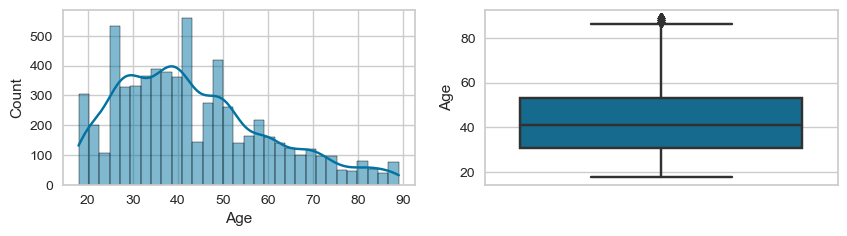

<Figure size 800x550 with 0 Axes>

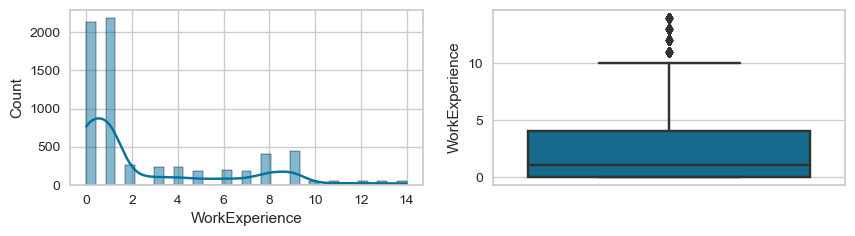

In [14]:
for ele in num_feat:
    plt.figure(1)
    plt.figure(figsize = (10,5))
    plt.subplot(221)
    sns.histplot(data[ele],kde=True)
    plt.subplot(222)
    sns.boxplot(y = data[ele])

In [15]:
## lets explore categorical feature

def countplot(feat):
    '''
    This function takes feature as input and plots count plot
    '''
    plt.figure(figsize = (10,5))
    sns.countplot(feat)
    print("count of distinct values:")
    print(feat.value_counts())

count of distinct values:
Male      3677
Female    2988
Name: Gender, dtype: int64


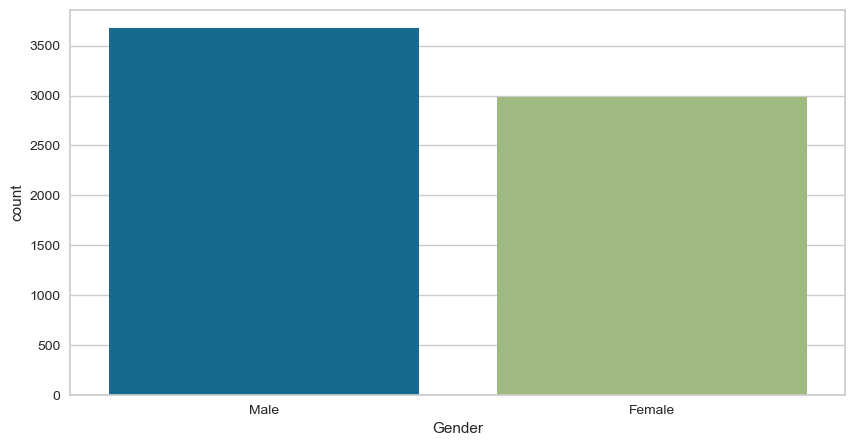

In [16]:
## Gender
countplot(data['Gender'])

There are total 3677 Male and 2988 Female customers in dataset.

count of distinct values:
Yes    3944
No     2721
Name: Married, dtype: int64


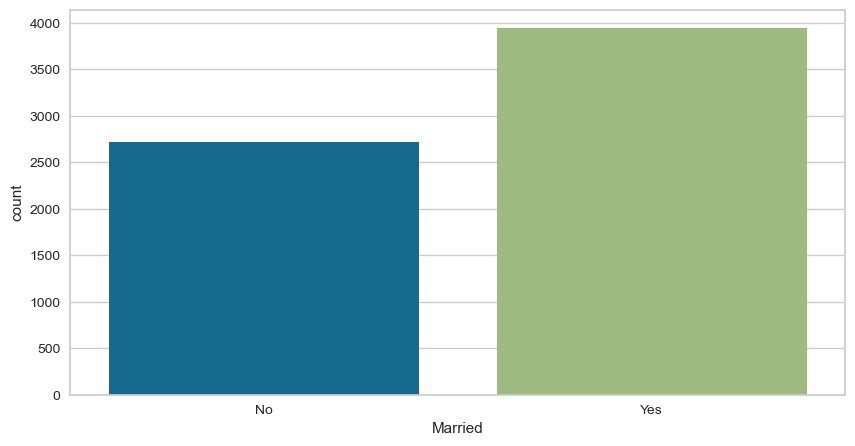

In [17]:
## Married
countplot(data['Married'])

out of 6665 customers, 3944 customers are married and 2721 are not married  

count of distinct values:
Yes    4249
No     2416
Name: Graduated, dtype: int64


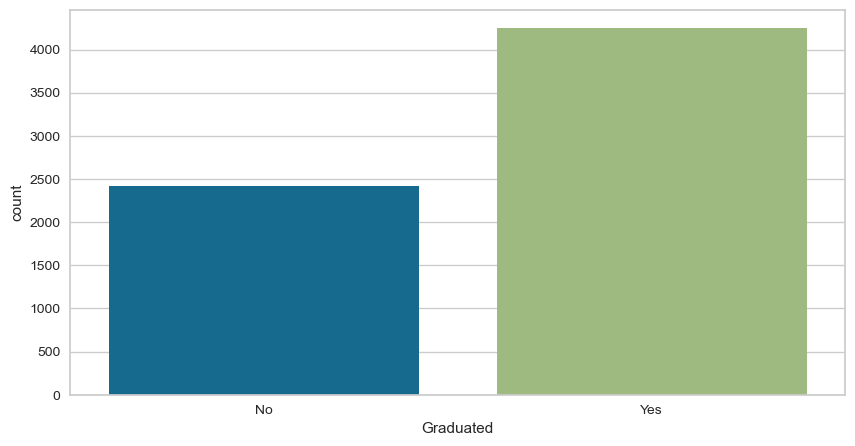

In [18]:
## Graduated
countplot(data['Graduated'])

out of 6665 customers, 4249 customers are Graduated and 2416 are not Graduated

count of distinct values:
Artist           2192
Healthcare       1077
Entertainment     809
Doctor            592
Engineer          582
Executive         505
Lawyer            500
Marketing         233
Homemaker         175
Name: Profession, dtype: int64


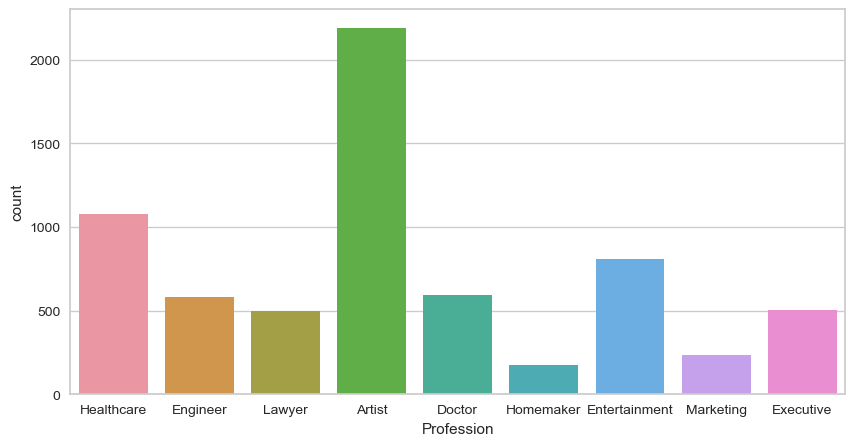

In [19]:
## Profession
countplot(data['Profession'])

Maximum customer are artist by the profession followed by the Healthcare and minimum have the Homemaker.

count of distinct values:
Low        3999
Average    1662
High       1004
Name: SpendingScore, dtype: int64


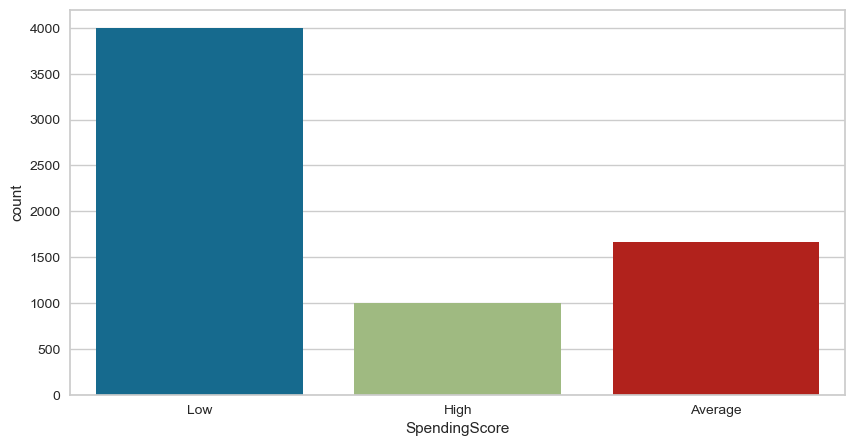

In [20]:
## SpendingScore
countplot(data['SpendingScore'])

Most of the customer have very high spending score follwed by average and High

count of distinct values:
2.0    2093
3.0    1292
1.0    1243
4.0    1174
5.0     522
6.0     180
7.0      81
8.0      42
9.0      38
Name: FamilySize, dtype: int64


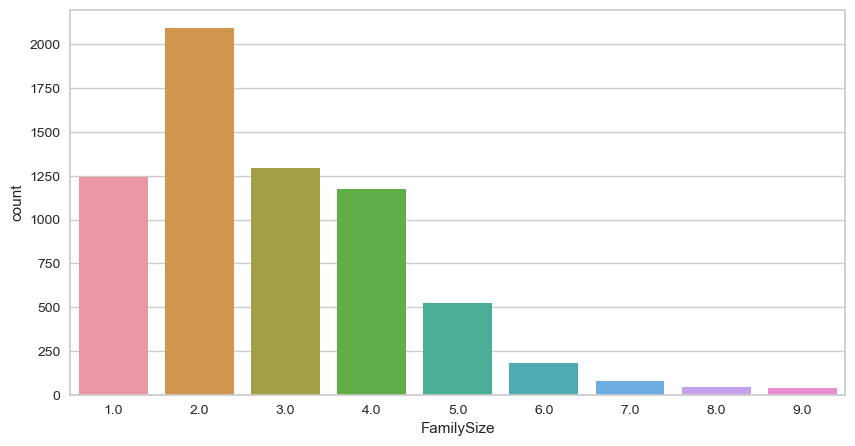

In [21]:
## FamilySize
countplot(data['FamilySize'])

most the customer (2093) have the family size of 2 followed by 3.0 However some has the family size equals to 9

count of distinct values:
Category 6    4476
Category 4     849
Category 3     634
Category 2     362
Category 7     166
Category 1     104
Category 5      74
Name: Category, dtype: int64


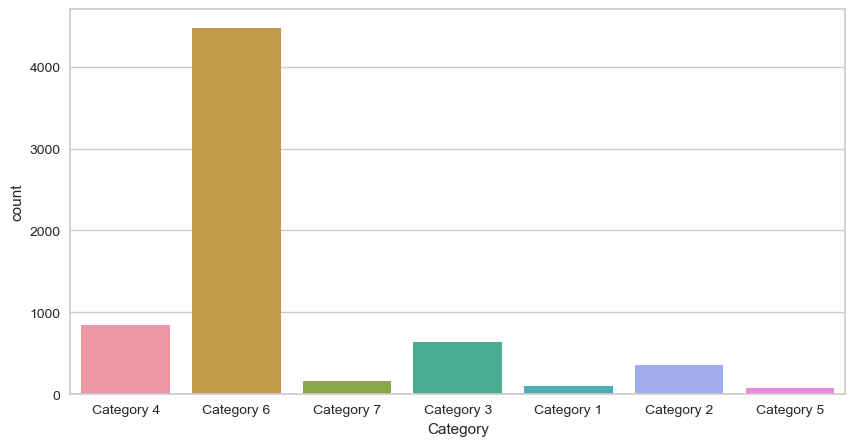

In [22]:
## Category
countplot(data['Category'])

out of all the category, maximum number of customer belongs to category 6 and minimum belong to the category 5

**Bivariate analysis**

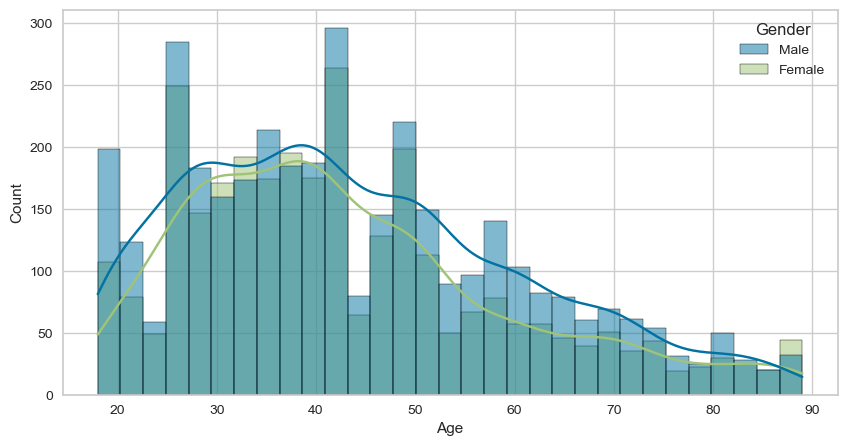

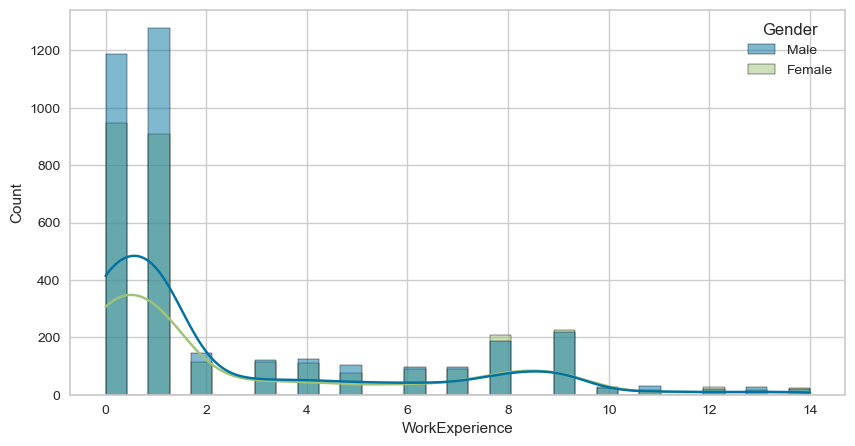

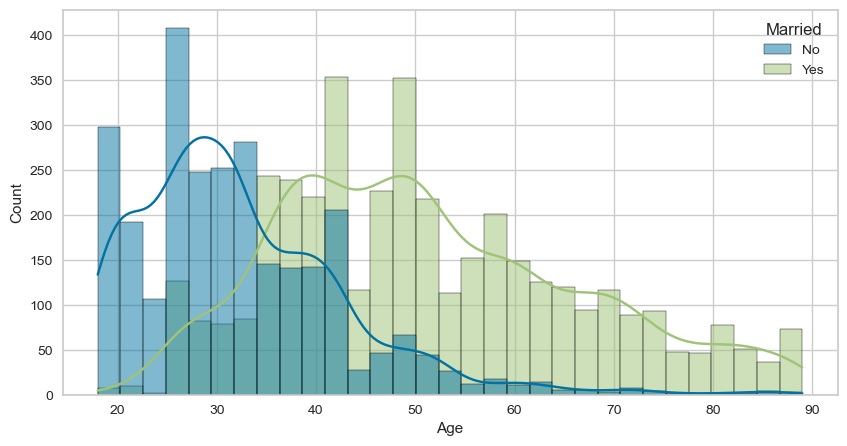

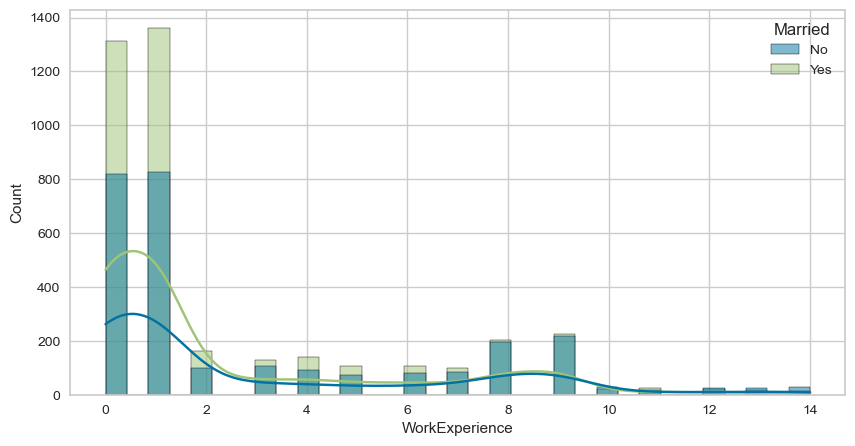

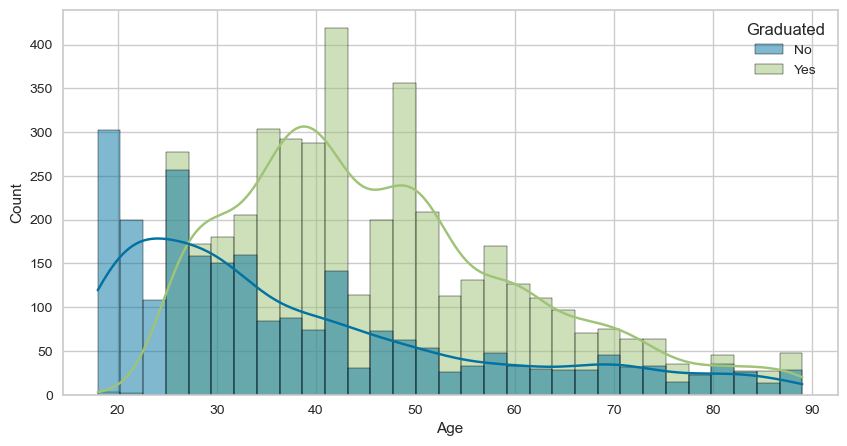

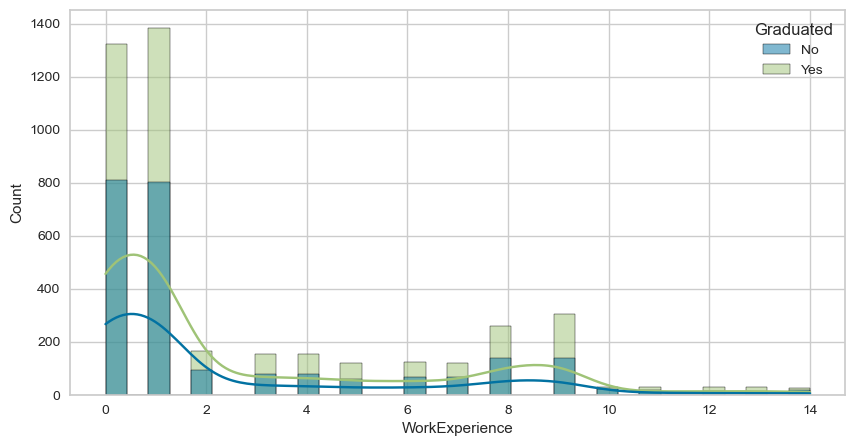

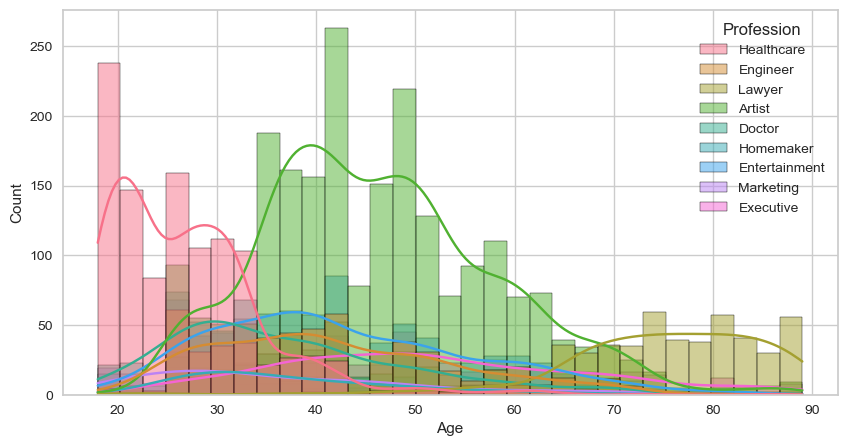

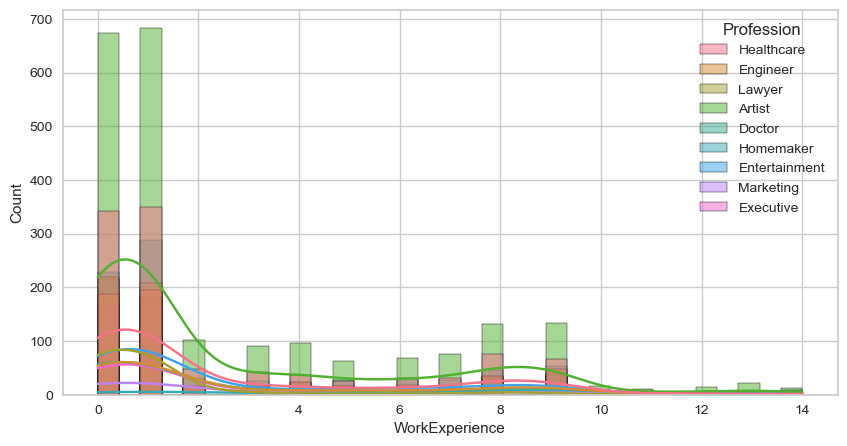

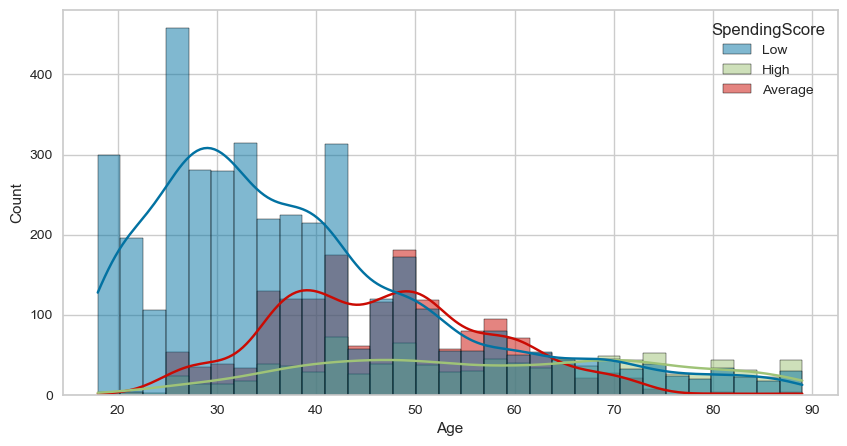

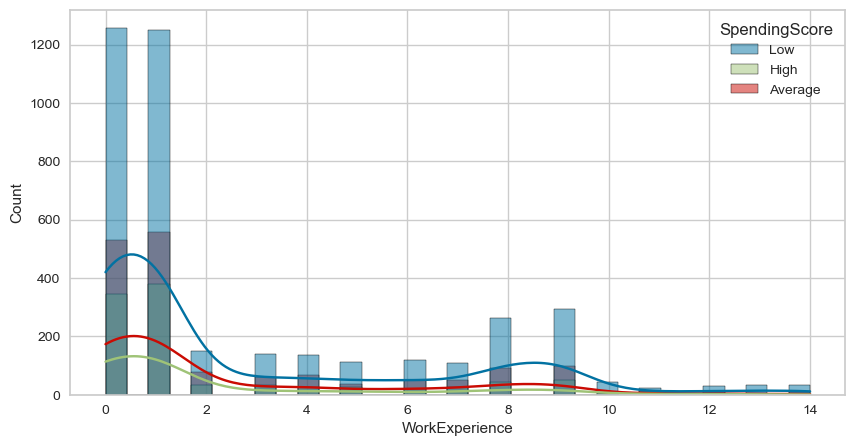

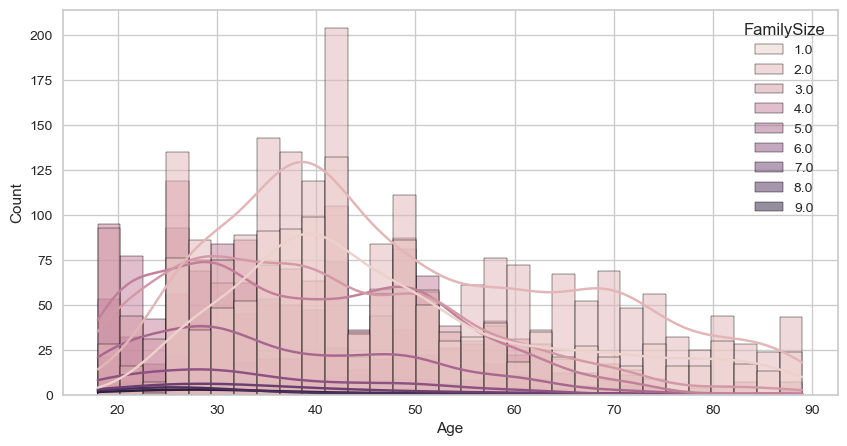

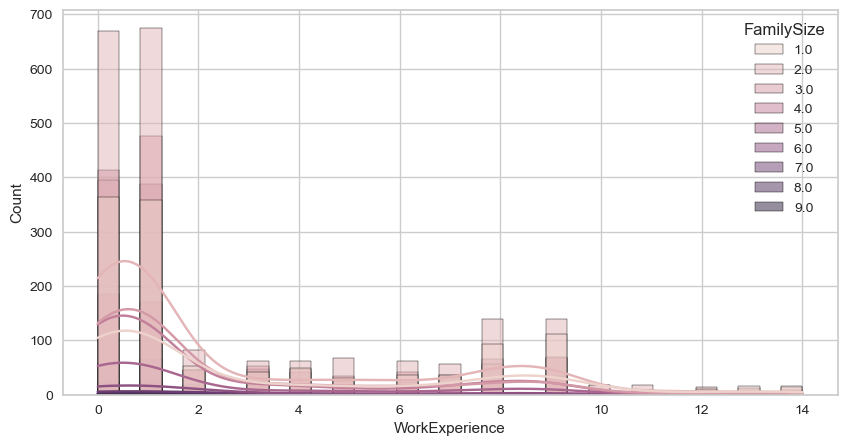

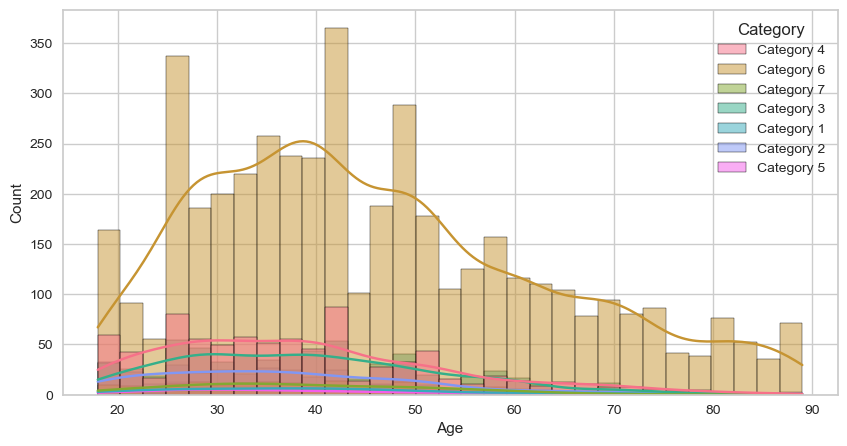

<Figure size 800x550 with 0 Axes>

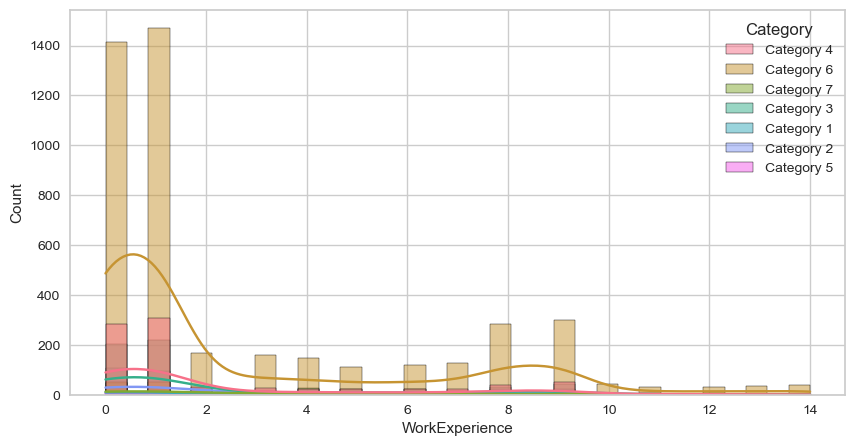

In [23]:
for col in cat_feat:
    for ele in num_feat:
        plt.figure(1)
        plt.figure(figsize = (10,5))
        sns.histplot(x=data[ele],hue = data[col],kde =True)
        #plt.subplot(222)
        #sns.boxplot(y = data[ele],hue = data[col])
    

<AxesSubplot:>

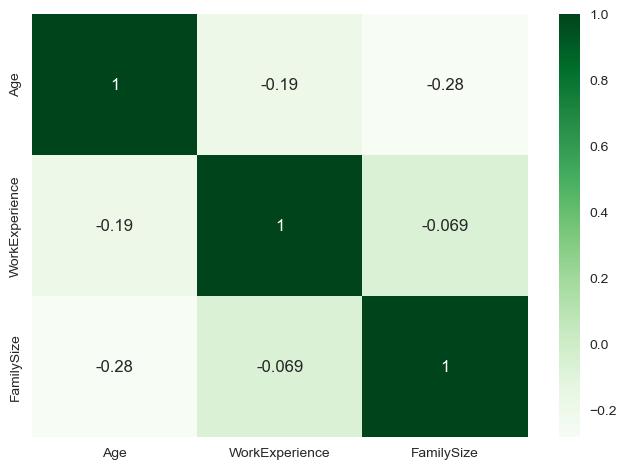

In [24]:
## correlation 
corr = data.corr()
sns.heatmap(corr, cmap="Greens",annot=True )

## Data preparation

In [25]:
cat_data = pd.get_dummies(data[cat_feat])

In [26]:
cat_data.head(10)

,FamilySize,Gender_Female,Gender_Male,Married_No,Married_Yes,Graduated_No,Graduated_Yes,Profession_Artist,Profession_Doctor,Profession_Engineer,...,SpendingScore_Average,SpendingScore_High,SpendingScore_Low,Category_Category 1,Category_Category 2,Category_Category 3,Category_Category 4,Category_Category 5,Category_Category 6,Category_Category 7
0,4.0,0,1,1,0,1,0,0,0,0,...,0,0,1,0,0,0,1,0,0,0
2,1.0,1,0,0,1,0,1,0,0,1,...,0,0,1,0,0,0,0,0,1,0
3,2.0,0,1,0,1,0,1,0,0,0,...,0,1,0,0,0,0,0,0,1,0
5,2.0,0,1,0,1,1,0,1,0,0,...,1,0,0,0,0,0,0,0,1,0
6,3.0,0,1,1,0,0,1,0,0,0,...,0,0,1,0,0,0,0,0,1,0
7,3.0,1,0,1,0,0,1,0,0,0,...,0,0,1,0,0,0,0,0,1,0
8,3.0,1,0,0,1,0,1,0,0,1,...,0,0,1,0,0,0,0,0,0,1
9,4.0,1,0,0,1,0,1,1,0,0,...,1,0,0,0,0,0,0,0,1,0
10,3.0,1,0,1,0,0,1,0,0,1,...,0,0,1,0,0,0,0,0,1,0
11,4.0,0,1,1,0,1,0,0,0,0,...,0,0,1,0,0,0,1,0,0,0


Text(0, 0.5, 'pc2')

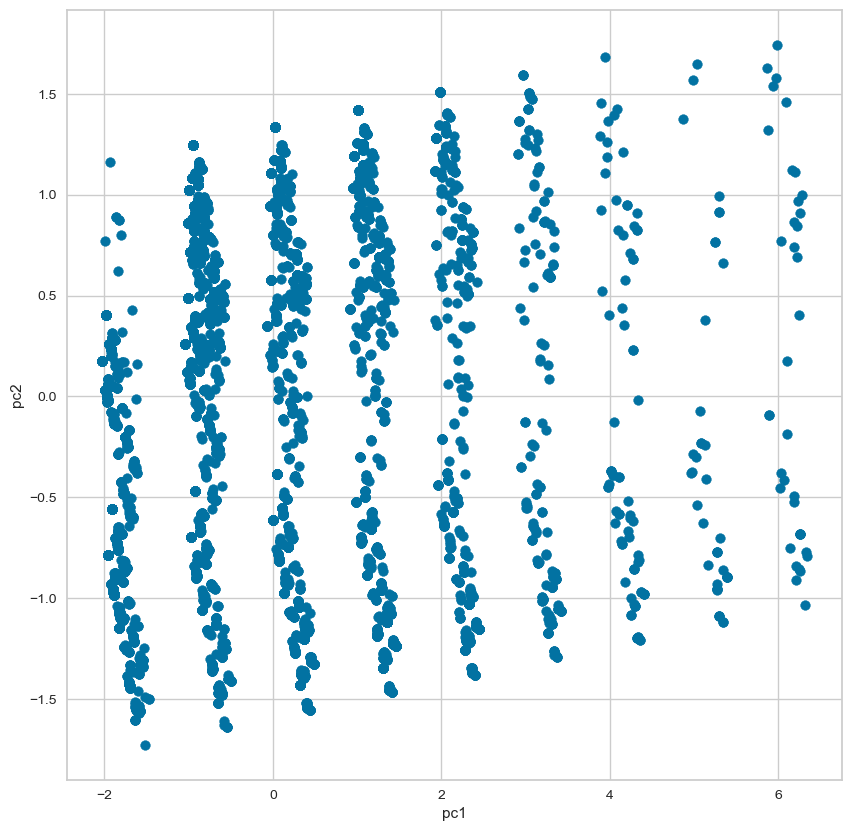

In [27]:
pca = PCA()
x = pca.fit_transform(cat_data)
plt.figure(figsize=(10,10))
plt.scatter(x[:,0],x[:,1],cmap='viridis')
plt.xlabel('pc1')
plt.ylabel('pc2')

Text(0, 0.5, 'pc2')

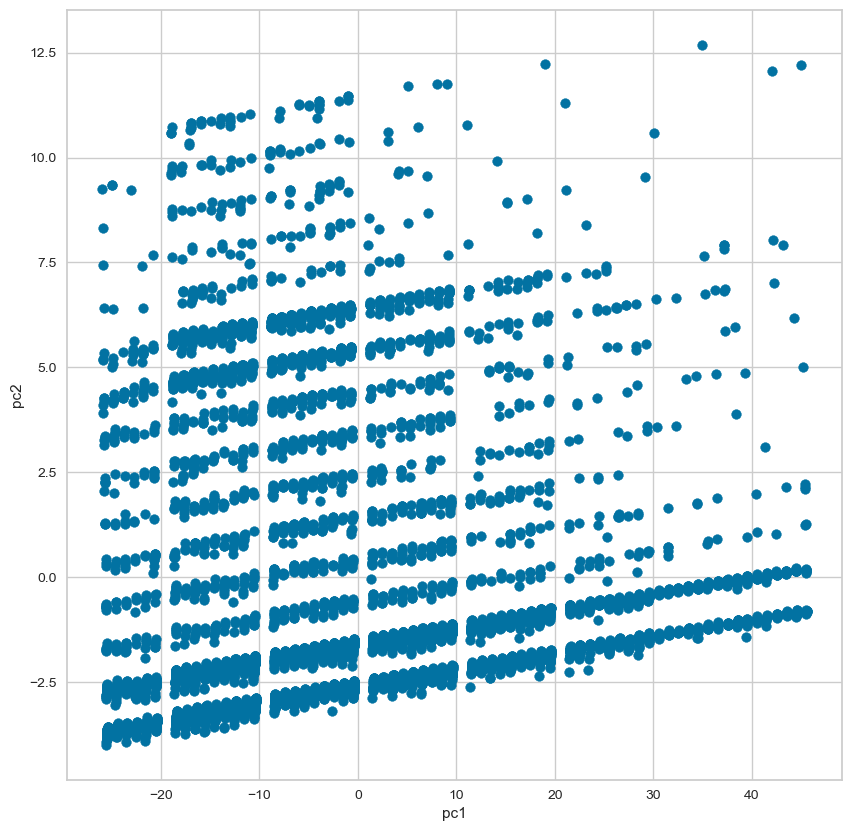

In [28]:
## Lets perform pca on total dataset
data1 = pd.get_dummies(data)
scalar = preprocessing.StandardScaler()
data1_tr = scalar.fit_transform(data1)
pca1 = PCA()
x1 = pca1.fit_transform(data1)
plt.figure(figsize=(10,10))
plt.scatter(x1[:,0],x1[:,1],cmap='viridis')
plt.xlabel('pc1')
plt.ylabel('pc2')

from above pca analysis we can see that only categorical dataset can be categorized in to 9 different groups

## clustering

In [29]:
## for categorical value
# Fit the model
scaler_rec_mon = preprocessing.StandardScaler()
X_rec_mon = scaler_rec_mon.fit_transform(cat_data)
X=X_rec_mon
range_n_clusters = [2,3,4,5,6,7,8,9,10,11,12,13,14]
for n_clusters in range_n_clusters:
    clusterer = KMeans(n_clusters=n_clusters)
    preds = clusterer.fit_predict(X)
    centers = clusterer.cluster_centers_
    # Checking the silhouette score on clusters
    score = silhouette_score(X,preds)
    print(' For n_clusters = {}, silhouette sore is {}'.format (n_clusters, score))

 For n_clusters = 2, silhouette sore is 0.14308236342738778
 For n_clusters = 3, silhouette sore is 0.14062675162395083
 For n_clusters = 4, silhouette sore is 0.14167552441397718
 For n_clusters = 5, silhouette sore is 0.16558381687792964
 For n_clusters = 6, silhouette sore is 0.17507804357095025
 For n_clusters = 7, silhouette sore is 0.17912619370491206
 For n_clusters = 8, silhouette sore is 0.19504654762879167
 For n_clusters = 9, silhouette sore is 0.21278040373717477
 For n_clusters = 10, silhouette sore is 0.22186996778719334
 For n_clusters = 11, silhouette sore is 0.22016648817746173
 For n_clusters = 12, silhouette sore is 0.23132200439676892
 For n_clusters = 13, silhouette sore is 0.24239462859156474
 For n_clusters = 14, silhouette sore is 0.23358431948230488


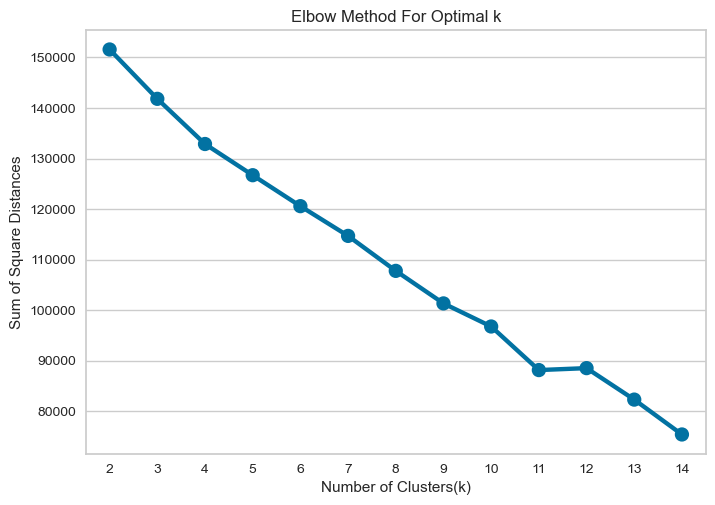

In [30]:
#elbow method 
sum_of_sq_dist = {}
K = [2,3,4,5,6,7,8,9,10,11,12,13,14]
for k in K:
    kmeans = KMeans(n_clusters= k)
    kmeans = kmeans.fit(X)
    sum_of_sq_dist[k] = kmeans.inertia_


    
# Plotting the graph for the sum of square distance values and Number of Clusters
sns.pointplot(x = list(sum_of_sq_dist.keys()), y = list(sum_of_sq_dist.values()))
plt.xlabel('Number of Clusters(k)')
plt.ylabel('Sum of Square Distances')
plt.title('Elbow Method For Optimal k')
plt.show()

In [31]:
## Lets go for complete dataset
range_n_clusters = [2,3,4,5,6,7,8,9,10,11,12,13,14]
for n_clusters in range_n_clusters:
    clusterer = KMeans(n_clusters=n_clusters)
    preds = clusterer.fit_predict(x1)
    centers = clusterer.cluster_centers_
    # Checking the silhouette score on clusters
    score = silhouette_score(X,preds)
    print(' For n_clusters = {}, silhouette sore is {}'.format (n_clusters, score))

 For n_clusters = 2, silhouette sore is 0.039817005925347905
 For n_clusters = 3, silhouette sore is 0.03035734874641304
 For n_clusters = 4, silhouette sore is 0.027338951374792378
 For n_clusters = 5, silhouette sore is 0.007723020510388589
 For n_clusters = 6, silhouette sore is -0.004137140846215113
 For n_clusters = 7, silhouette sore is -0.0162061066322844
 For n_clusters = 8, silhouette sore is -0.019111413918894895
 For n_clusters = 9, silhouette sore is -0.02239940379588258
 For n_clusters = 10, silhouette sore is -0.023212665232316083
 For n_clusters = 11, silhouette sore is -0.029427117050775334
 For n_clusters = 12, silhouette sore is -0.027160053009874573
 For n_clusters = 13, silhouette sore is -0.0349132468567799
 For n_clusters = 14, silhouette sore is -0.03967536442981449


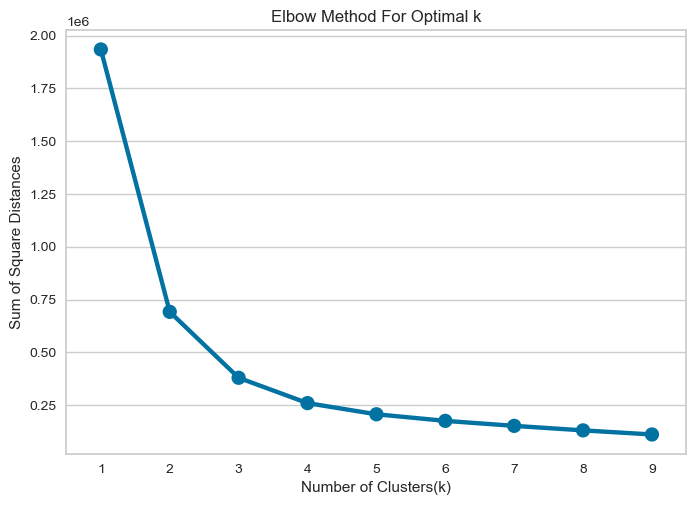

In [32]:
#elbow method 
sum_of_sq_dist = {}
K = range(1,10)
for k in K:
    kmeans = KMeans(n_clusters= k)
    kmeans = kmeans.fit(x1)
    sum_of_sq_dist[k] = kmeans.inertia_


    
# Plotting the graph for the sum of square distance values and Number of Clusters
sns.pointplot(x = list(sum_of_sq_dist.keys()), y = list(sum_of_sq_dist.values()))
plt.xlabel('Number of Clusters(k)')
plt.ylabel('Sum of Square Distances')
plt.title('Elbow Method For Optimal k')
plt.show()

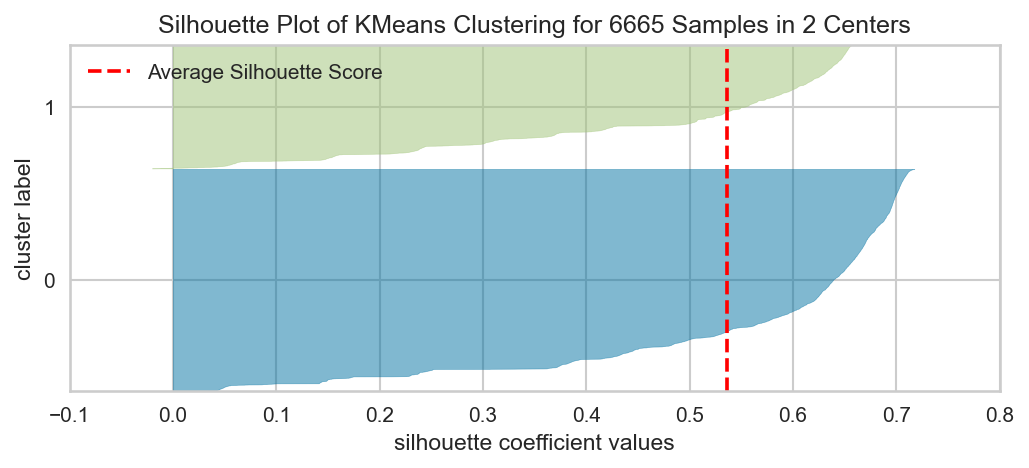

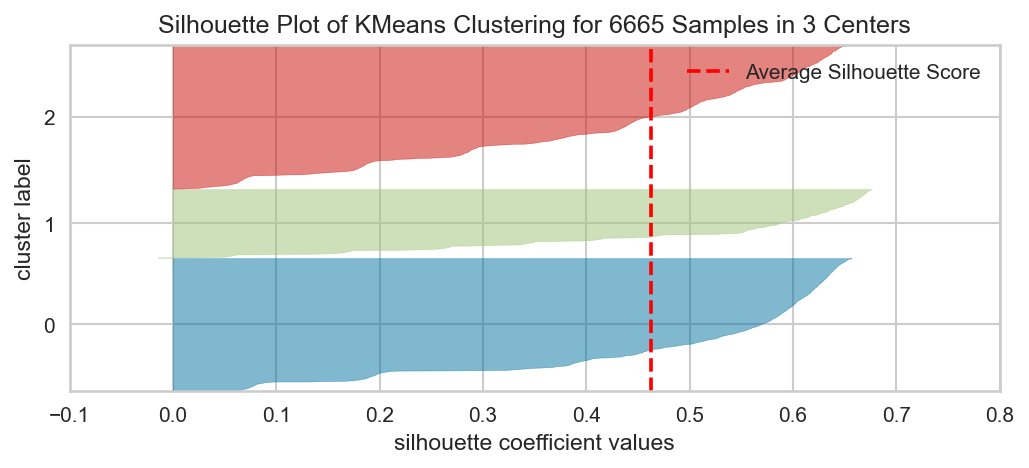

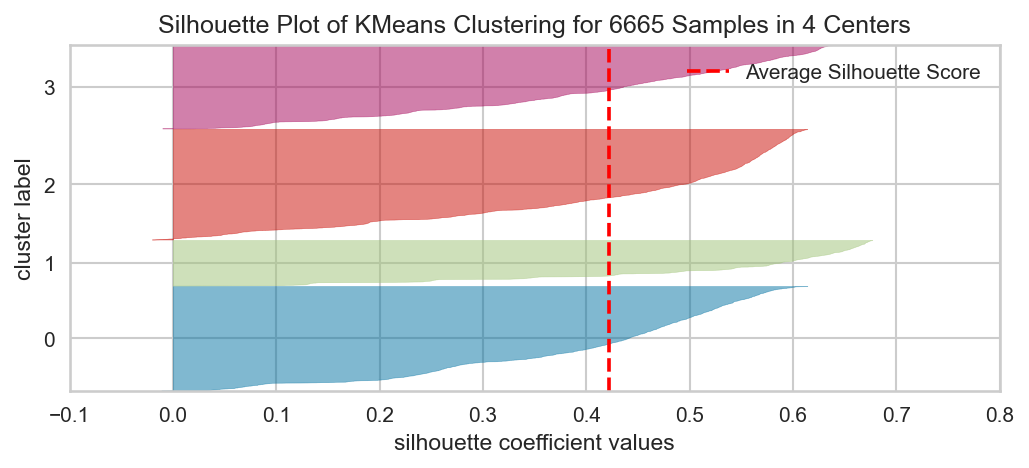

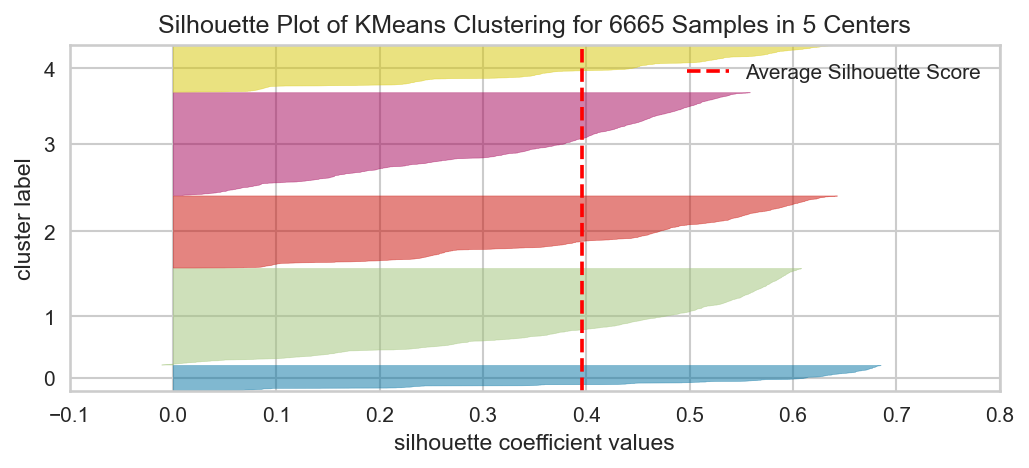

In [33]:
# Visualizing the Silouette plots for the clusters
for i in range(2,6):
    plt.figure(figsize = (8, 3), dpi=150)
    kmeans=KMeans(i,init="k-means++")
    sil_vis=SilhouetteVisualizer(kmeans,colors='yellowbrick')
    sil_vis.fit(x1)
    sil_vis.show()
     

the optimum number of cluster based on the complete dataset is two.


In [34]:
## So lets perform the segmentation on the setting the number of cluster =2
kmeans = KMeans(n_clusters=2)
kmeans = kmeans.fit(x1)

In [35]:
data['cluster_no'] = kmeans.predict(x1)

In [36]:
data['cluster_no'].value_counts()

1    4284
0    2381
Name: cluster_no, dtype: int64

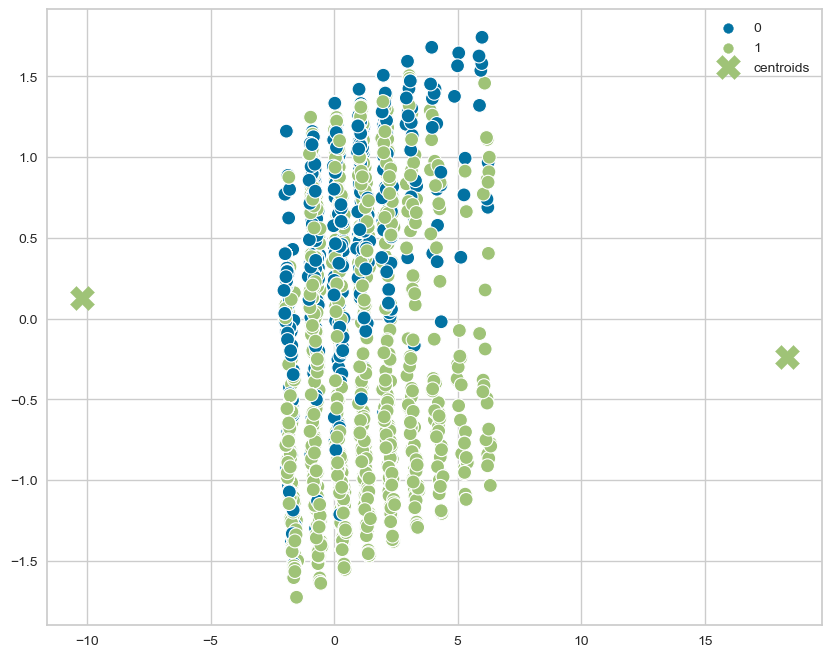

In [37]:
cluster_label = kmeans.labels_
plt.figure(figsize=(10,8))
sns.scatterplot(x[:,0],x[:,1], hue=cluster_label, s=100)
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], marker="X", c="g", s=300, label="centroids")
plt.legend()
plt.show()

count of distinct values:
1    4284
0    2381
Name: cluster_no, dtype: int64


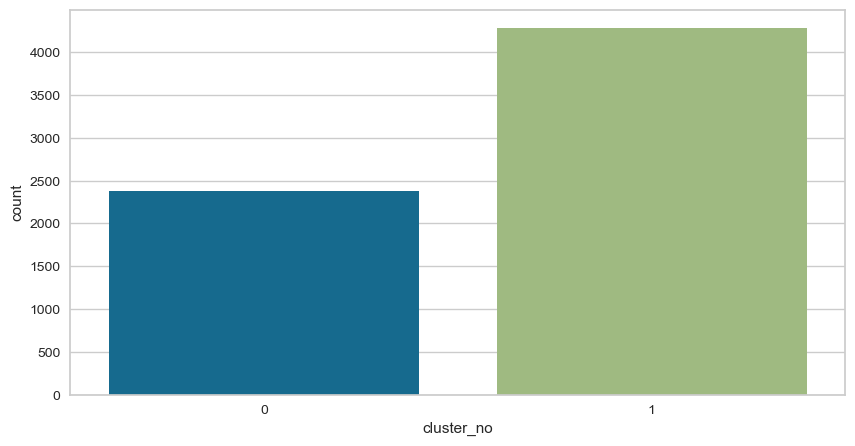

In [38]:
countplot(data['cluster_no'])

In [39]:
df1 = data.groupby('cluster_no').mean().reset_index()
df1

,cluster_no,Age,WorkExperience,FamilySize
0,0,61.816044,1.664847,2.516170
1,1,33.376284,3.165033,3.021709


In [40]:
## Lets analse the feature of both the clusters
df_c0 = data[data['cluster_no'] == 0]
df_c1 = data[data['cluster_no'] == 1]

In [41]:
print("data set having cluster no 0")
print(df_c0.describe())
print("--"*50)
print("data set having cluster no 1")
print(df_c1.describe())

data set having cluster no 0
               Age  WorkExperience   FamilySize  cluster_no
count  2381.000000     2381.000000  2381.000000      2381.0
mean     61.816044        1.664847     2.516170         0.0
std      11.343888        2.560080     1.340486         0.0
min      48.000000        0.000000     1.000000         0.0
25%      52.000000        0.000000     2.000000         0.0
50%      59.000000        1.000000     2.000000         0.0
75%      70.000000        1.000000     3.000000         0.0
max      89.000000       14.000000     9.000000         0.0
----------------------------------------------------------------------------------------------------
data set having cluster no 1
               Age  WorkExperience   FamilySize  cluster_no
count  4284.000000     4284.000000  4284.000000      4284.0
mean     33.376284        3.165033     3.021709         1.0
std       8.019813        3.687423     1.589789         0.0
min      18.000000        0.000000     1.000000         1.0
2

**Hierarchical clustering**

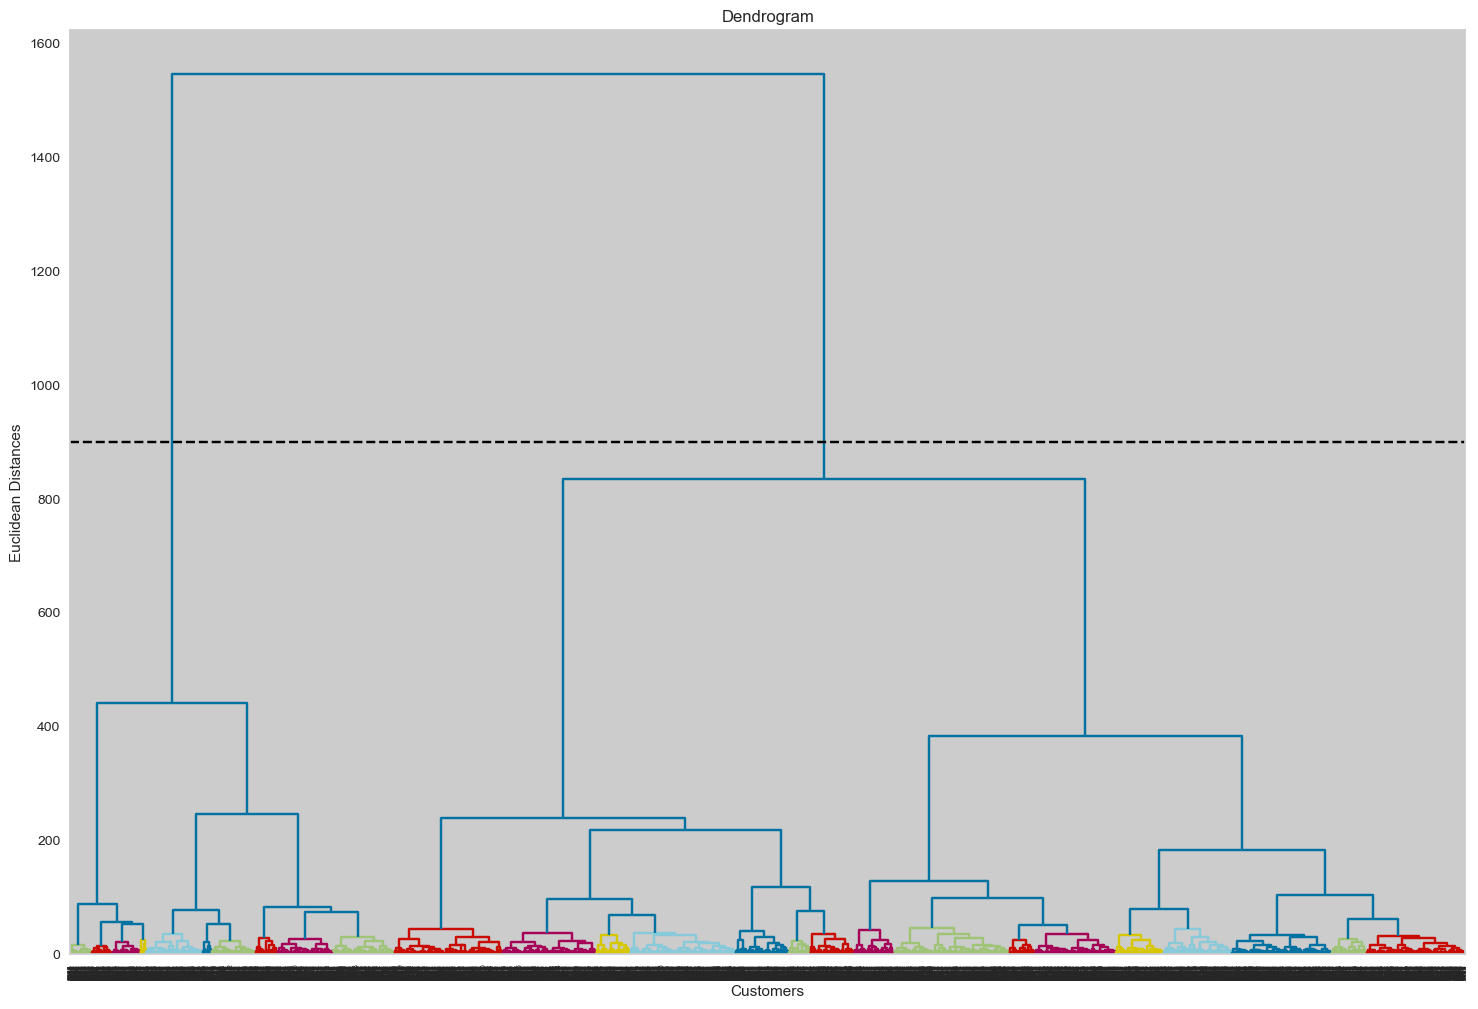

In [52]:
#Plotting Dendrogram to get optimal number of clusters

#Setting plot specs
plt.figure(figsize=(18,12))

#Using Ward's Linkage Method to Differ Similarities
dendrogram(linkage(x1, method='ward'), color_threshold=50)

#Setting plot parameters
plt.title('Dendrogram')                                    
plt.xlabel('Customers')                                    
plt.ylabel('Euclidean Distances')    

#Setting Threshold at y=70
plt.axhline(y=900, color='black', linestyle='--')

In [43]:
# Fitting hierarchical clustering to the mall dataset
from sklearn.cluster import AgglomerativeClustering
clus = [2,3,4,5,6,7,8]
for ele in clus:
    hc = AgglomerativeClustering(n_clusters = ele, affinity = 'euclidean', linkage = 'ward')
    y_hc = hc.fit_predict(x1)
   
    
    # Checking the silhouette score on clusters
    score = silhouette_score(x1,y_hc)
    print(' For n_clusters = {}, silhouette sore is {}'.format (ele, score))

 For n_clusters = 2, silhouette sore is 0.554249059048291
 For n_clusters = 3, silhouette sore is 0.4585951177061037
 For n_clusters = 4, silhouette sore is 0.4365443221511386
 For n_clusters = 5, silhouette sore is 0.3813565853438388
 For n_clusters = 6, silhouette sore is 0.3805260363998144
 For n_clusters = 7, silhouette sore is 0.33654366994090806
 For n_clusters = 8, silhouette sore is 0.3606211502599045


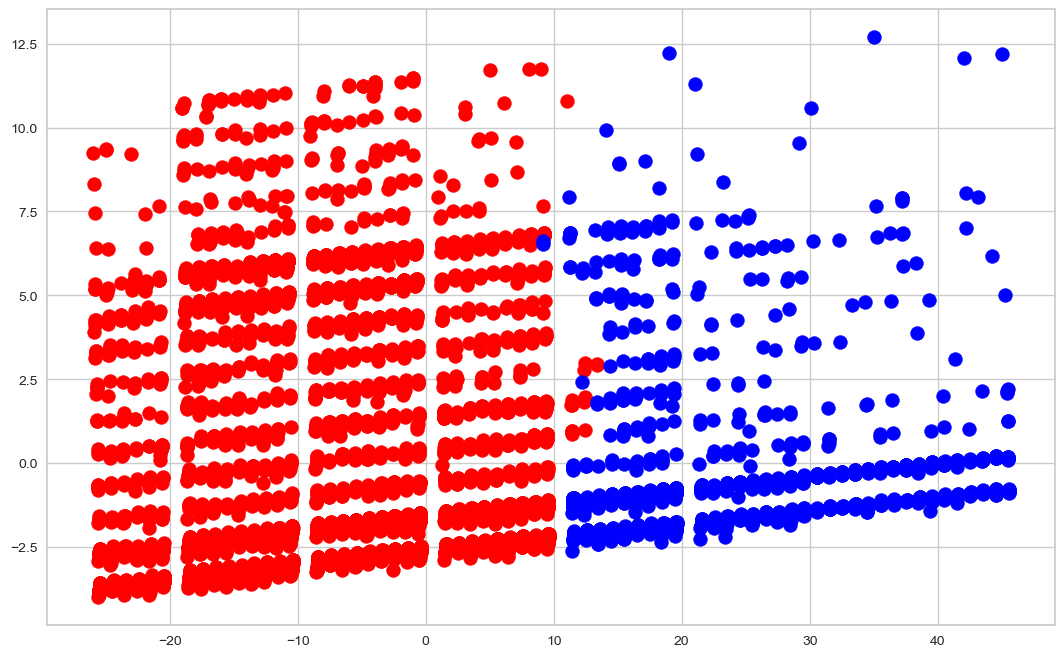

In [44]:
## since maximum silhoutte score observe is for 2 cluster
hc = AgglomerativeClustering(n_clusters = 2, affinity = 'euclidean', linkage = 'ward')
y_hc = hc.fit_predict(x1)
# Visualizing the clusters (two dimensions only)
plt.figure(figsize=(13,8))
plt.scatter(x1[y_hc == 0, 0], x1[y_hc == 0, 1], s = 100, c = 'red', label = 'Customer 1')
plt.scatter(x1[y_hc == 1, 0], x1[y_hc == 1, 1], s = 100, c = 'blue', label = 'Customer 2')

In [45]:
data['cluster_no_high'] = y_hc

In [46]:
## Lets analse the feature of both the clusters
df_c0_hi = data[data['cluster_no_high'] == 0]
df_c1_hi = data[data['cluster_no_high'] == 1]

In [47]:
print("data set having cluster no 0")
print(df_c0_hi.describe())
print("--"*50)
print("data set having cluster no 1")
print(df_c1_hi.describe())

data set having cluster no 0
               Age  WorkExperience   FamilySize   cluster_no  cluster_no_high
count  5116.000000     5116.000000  5116.000000  5116.000000           5116.0
mean     36.179242        3.004691     2.990227     0.837373              0.0
std       9.739748        3.586275     1.565732     0.369061              0.0
min      18.000000        0.000000     1.000000     0.000000              0.0
25%      28.000000        0.000000     2.000000     1.000000              0.0
50%      36.000000        1.000000     3.000000     1.000000              0.0
75%      43.000000        6.000000     4.000000     1.000000              0.0
max      57.000000       14.000000     9.000000     1.000000              0.0
----------------------------------------------------------------------------------------------------
data set having cluster no 1
               Age  WorkExperience   FamilySize  cluster_no  cluster_no_high
count  1549.000000     1549.000000  1549.000000      1549.0   

In [48]:
df = data.groupby('cluster_no_high').mean().reset_index()

In [49]:
df

,cluster_no_high,Age,WorkExperience,FamilySize,cluster_no
0,0,36.179242,3.004691,2.990227,0.837373
1,1,67.834087,1.388638,2.348612,0.000000


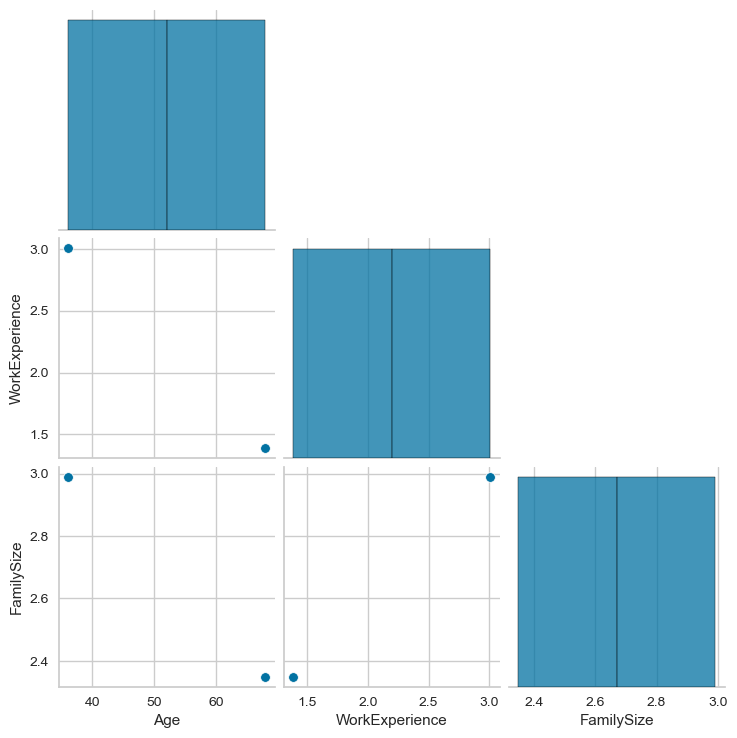

In [50]:
sns.pairplot(df[['Age','WorkExperience','FamilySize']],corner=True)